In [1]:
from scipy import misc
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [45]:
def cuttleVision(cSpher,fN,nStk,off,defAtt):
    img = 1.0*misc.imread(fN)
    sBNarrower = 1.0*misc.imread('./sBandiensisNarrower-1.tif')
    sBNarrow = 1.0*misc.imread('./sBandiensisNarrow-1.tif')
    sBFull = 1.0*misc.imread('./sBandiensisFuller-1.tif')
    
    dimX = np.shape(sBNarrower)[0]
    mid = dimX/2
    dimImg = np.shape(img)[0]
    
    N = 12.5 #25mm eye
    x1, y1 = np.meshgrid(np.arange(-N,N-N/dimX,2*N/dimX),np.arange(-N,N-N/dimX,2*N/dimX))
    
    rad = np.sqrt(x1**2+y1**2)
    
    apDef = np.exp(np.sqrt(3)*(2*rad**2-1))
    apSpher = np.exp(np.sqrt(5) * (6*rad**4 - 6*rad**2+1))
    
    nStk = 3 # three focus depths
    
    imgStack = np.zeros([dimX,dimX,nStk+1])
    PSF = np.zeros([dimX,dimX,nStk+1])
    
    for c in range(1,nStk+1):
        cChromR = (c-1) / (nStk-1)
        cChromB = 1.0 - cChromR
        cChromG = 0.5 - cChromR
        if (0):
            apR1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromR/defAtt*apDef+cSpher*apSpher));
            apG1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromG/defAtt*apDef+cSpher*apSpher));
            apB1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromB/defAtt*apDef+cSpher*apSpher));
        if(1):
            apR1 = (sBFull) * np.exp(1j*2*np.pi*(cChromR/defAtt*apDef+cSpher*apSpher));
            apG1 = (sBFull) * np.exp(1j*2*np.pi*(cChromG/defAtt*apDef+cSpher*apSpher));
            apB1 = (sBFull) * np.exp(1j*2*np.pi*(cChromB/defAtt*apDef+cSpher*apSpher));
        
        apR1 = np.nan_to_num(apR1)
        apG1 = np.nan_to_num(apG1)
        apB1 = np.nan_to_num(apB1)
                
        PSF1R = np.abs(np.fft.fft2(apR1))**2
        PSF1G = np.abs(np.fft.fft2(apG1))**2
        PSF1B = np.abs(np.fft.fft2(apB1))**2
        
        #normalize PSFs
        PSF1R = PSF1R/np.max(np.max(PSF1R)); #%abs(fft(apR1)).^2;
        PSF1G = PSF1G/np.max(np.max(PSF1G));
        PSF1B = PSF1B/np.max(np.max(PSF1B));
        
        tempR = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,0],[dimX,dimX])*np.fft.fft2(PSF1R)))
        tempG = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,1],[dimX,dimX])*np.fft.fft2(PSF1G)))
        tempB = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,2],[dimX,dimX])*np.fft.fft2(PSF1B)))
        
        tempR = (tempR - np.min(tempR)) / np.max(tempR)
        tempG = (tempG - np.min(tempG)) / np.max(tempG)
        tempB = (tempB - np.min(tempB)) / np.max(tempB)
        
        tempR = tempR[0:dimImg,0:dimImg]
        tempG = tempG[0:dimImg,0:dimImg]
        tempB = tempB[0:dimImg,0:dimImg]
        
        plt.figure(figsize=(12,12))
        plt.subplot(321)
        plt.imshow(tempR,cmap='gray')
        plt.subplot(322)
        plt.imshow(tempG,cmap='gray')
        plt.subplot(323)
        plt.imshow(tempB,cmap='gray')
        #plt.figure()
        #plt.imshow(PSF1R)
        plt.show()
        myImgRGB = np.zeros([dimImg,dimImg,3])
        myImgRGB[:,:,0] = tempR
        myImgRGB[:,:,1] = tempG
        myImgRGB[:,:,2] = tempB
        plt.figure(figsize=(6,6))
        plt.imshow(myImgRGB)
        #plt.figure()
        #plt.imshow(PSF1R)
        plt.show()
    #return imgStack, imgStackRGB, PSF

/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in multiply


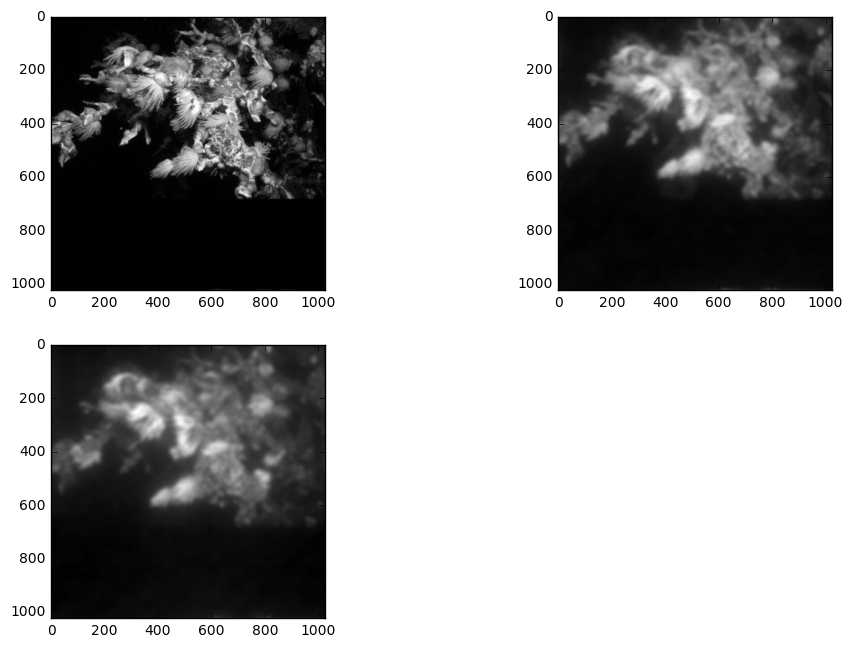

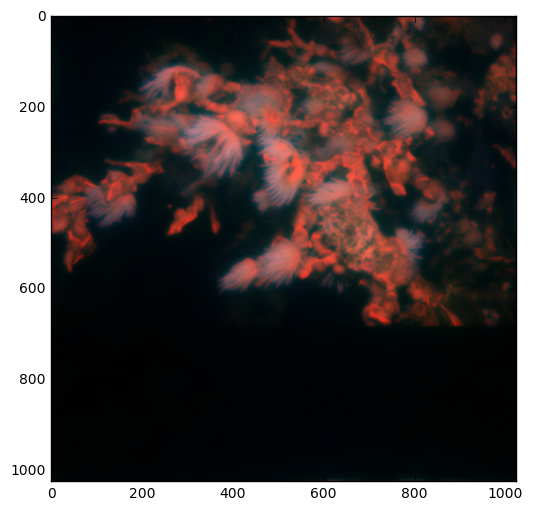

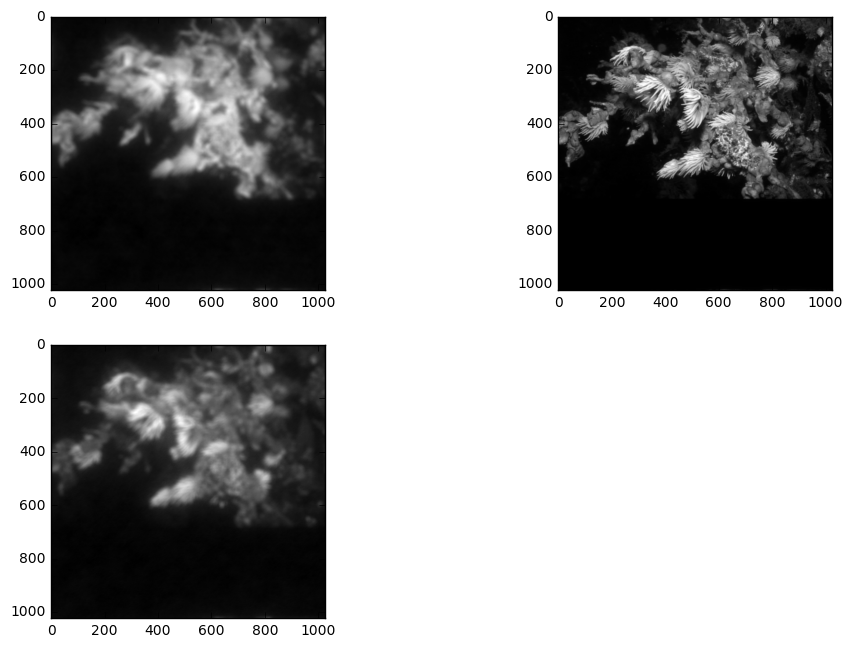

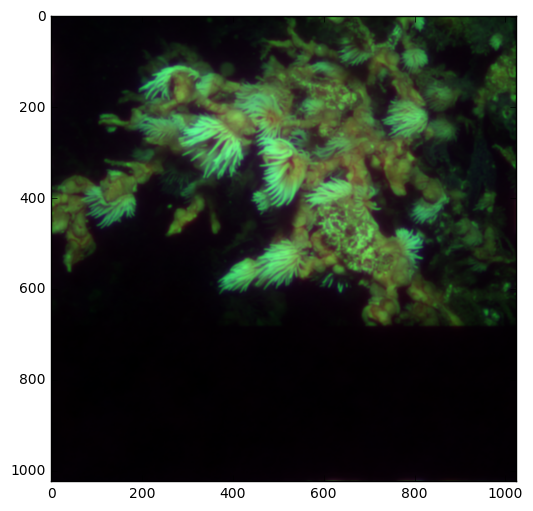

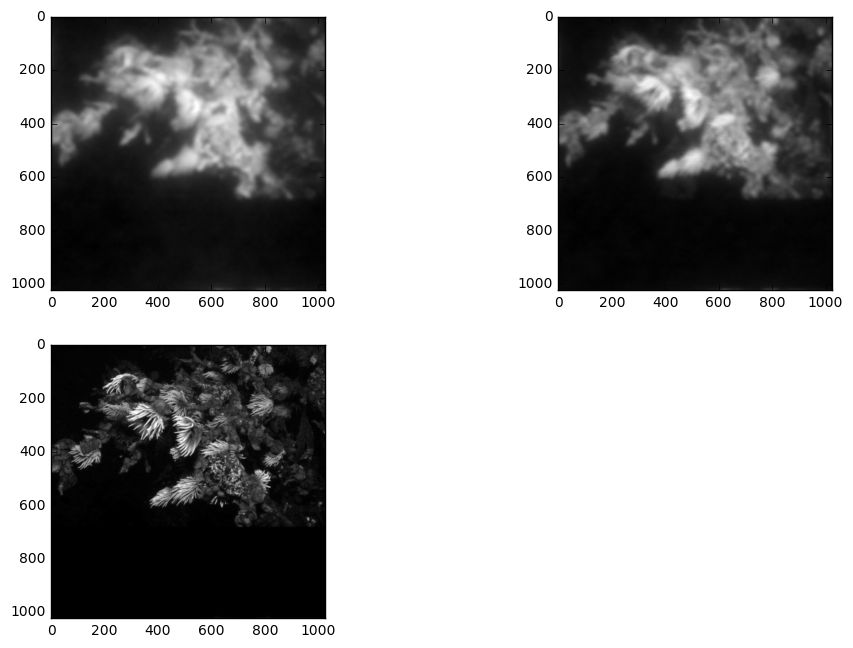

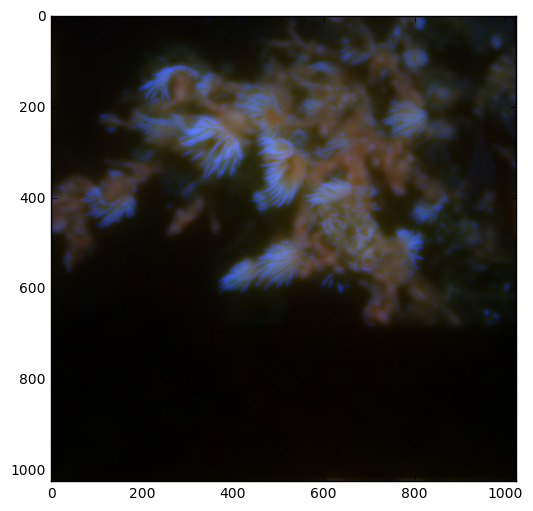

In [6]:
cSpher = 0
fN = './imgs/Sea_Cotton.jpg'
nStk = 3
off = 0
defAtt = 9
cuttleVision(cSpher,fN,nStk,off,defAtt)

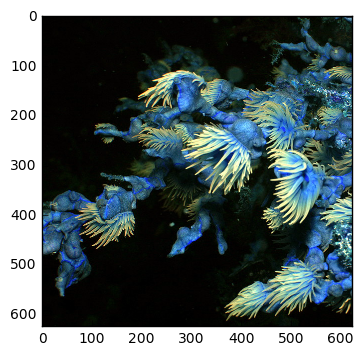

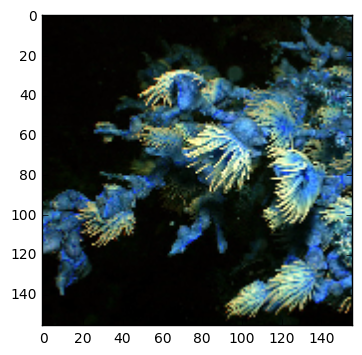

True

In [51]:
import cv2


fN = './imgs/Sea_Cotton.jpg'
myImg = cv2.imread(fN)
myImg = myImg[0:624,0:624]
myImg2 = cv.resize(myImg,None,fx=1/4, fy=1/4, interpolation = cv2.INTER_CUBIC)

plt.figure()
plt.imshow(myImg)
plt.figure()
plt.imshow(myImg2)
plt.show()
cv2.imwrite('minSea_Cotton.png',myImg2)

/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in multiply


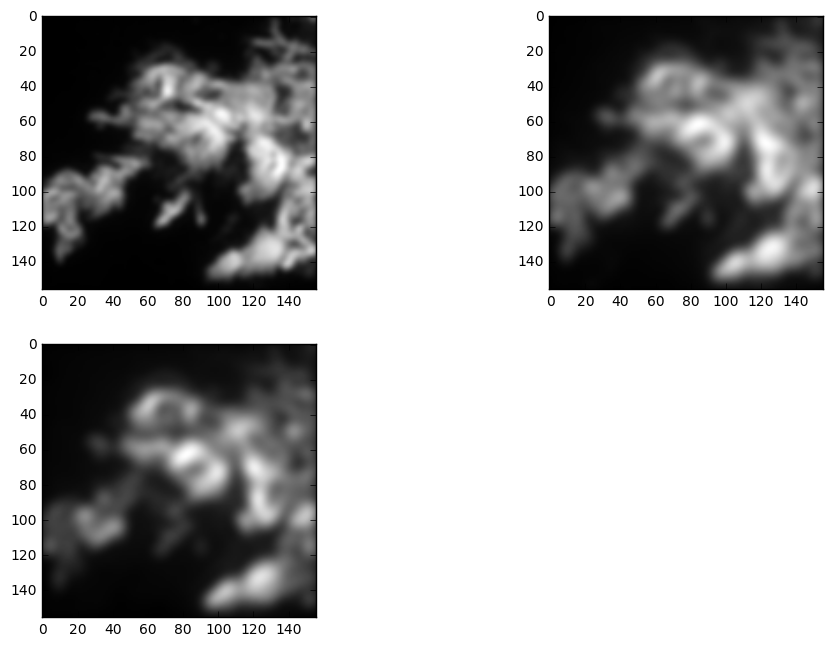

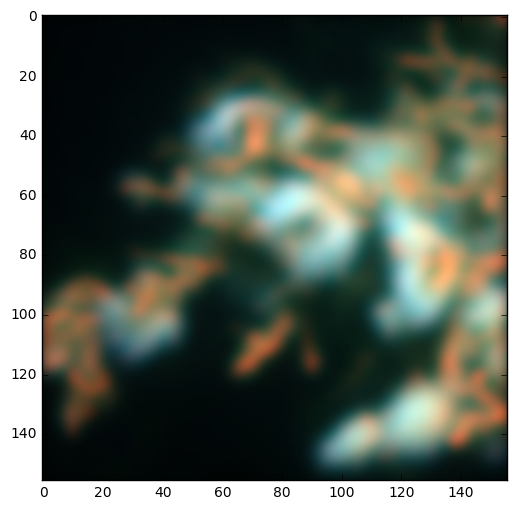

In [ ]:
cSpher = 0
fN = './minSea_Cotton.png'
nStk = 3
off = 0
defAtt = 9000
cuttleVision(cSpher,fN,nStk,off,defAtt)